<a href="https://colab.research.google.com/github/Rony-San/Deep-Learning-Project-Rony-Ba-ol/blob/main/02_Classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
!pip install --upgrade google-api-python-client google-auth-httplib2 google-auth-oauthlib


In [92]:
import gdown
import os
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# URL de la carpeta compartida
folder_url = "https://drive.google.com/drive/folders/1P9bgzza9OODgJKLQIV1fx-CLqGK3OUG5?usp=drive_link"

# Crear una carpeta local para almacenar las imágenes
if not os.path.exists('pokemon_images'):
    os.makedirs('pokemon_images')

# Extraer el contenido del folder
response = requests.get(folder_url)
soup = BeautifulSoup(response.text, 'html.parser')

# Encontrar todos los archivos en la carpeta
file_elements = soup.find_all('a', href=True)
file_links = [el['href'] for el in file_elements if "drive.google.com/file" in el['href']]

# Descargar y mostrar las primeras 5 imágenes
for idx, file_link in enumerate(file_links[:5]):  # Cambia el rango según cuántas imágenes quieras descargar
    # Convertir el enlace en un enlace directo
    file_id = file_link.split('/')[-2]
    download_url = f"https://drive.google.com/uc?id={file_id}"

    # Descargar usando gdown
    image_name = f"pokemon_image_{idx + 1}.png"
    print(f'Descargando {image_name} desde {download_url}')
    gdown.download(download_url, f"pokemon_images/{image_name}", quiet=False)

    # Mostrar la imagen descargada
    img = mpimg.imread(f"pokemon_images/{image_name}")
    plt.figure()
    plt.imshow(img)
    plt.title(image_name)
    plt.axis('off')  # Ocultar los ejes
    plt.show()


In [93]:
import gdown

# Enlace directo al archivo en Google Drive
file_url = 'https://drive.google.com/uc?id=1evrRxE3NlCL-wuoQrQAaHXwEKZHC2RzD'
output = 'pokemon_dataset.svc'

# Descargar el archivo
gdown.download(file_url, output, quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1evrRxE3NlCL-wuoQrQAaHXwEKZHC2RzD
To: /content/pokemon_dataset.svc
100%|██████████| 17.1k/17.1k [00:00<00:00, 25.4MB/s]


'pokemon_dataset.svc'

In [94]:
import pandas as pd

# Leer el archivo como un CSV
df = pd.read_csv('pokemon_dataset.svc')

# Mostrar las primeras filas del dataset
print(df.head())


         Name  Type1   Type2   Evolution
0   bulbasaur  Grass  Poison     ivysaur
1     ivysaur  Grass  Poison    venusaur
2    venusaur  Grass  Poison         NaN
3  charmander   Fire     NaN  charmeleon
4  charmeleon   Fire     NaN   charizard


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 809 entries, 0 to 808
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       809 non-null    object
 1   Type1      809 non-null    object
 2   Type2      405 non-null    object
 3   Evolution  32 non-null     object
dtypes: object(4)
memory usage: 25.4+ KB
None
             Name  Type1   Type2 Evolution
count         809    809     405        32
unique        809     18      18        32
top     bulbasaur  Water  Flying   ivysaur
freq            1    114      95         1
Name           0
Type1          0
Type2        404
Evolution    777
dtype: int64
Type1
Water       114
Normal      105
Grass        78
Bug          72
Fire         53
Psychic      53
Rock         46
Electric     40
Poison       34
Ground       32
Dark         29
Fighting     29
Ghost        27
Dragon       27
Steel        26
Ice          23
Fairy        18
Flying        3
Name: count, dtype: int64


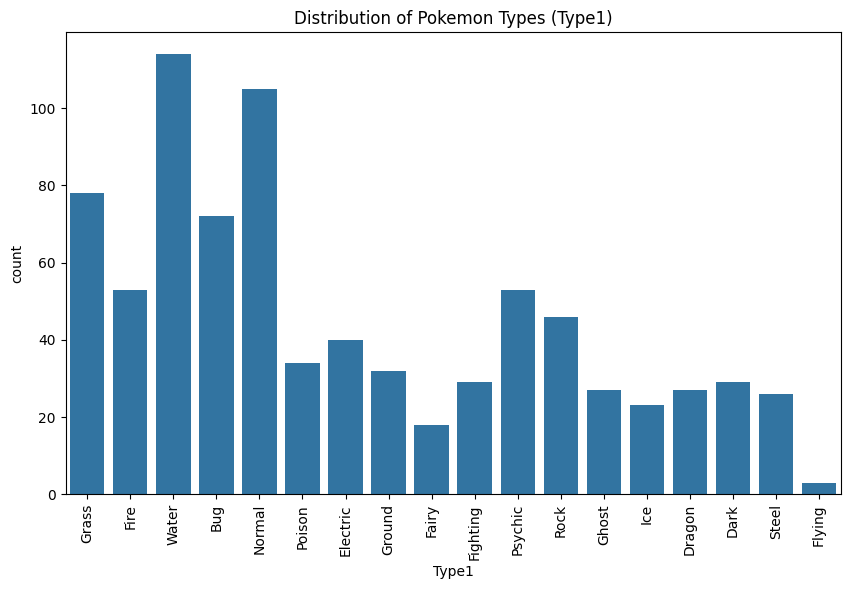

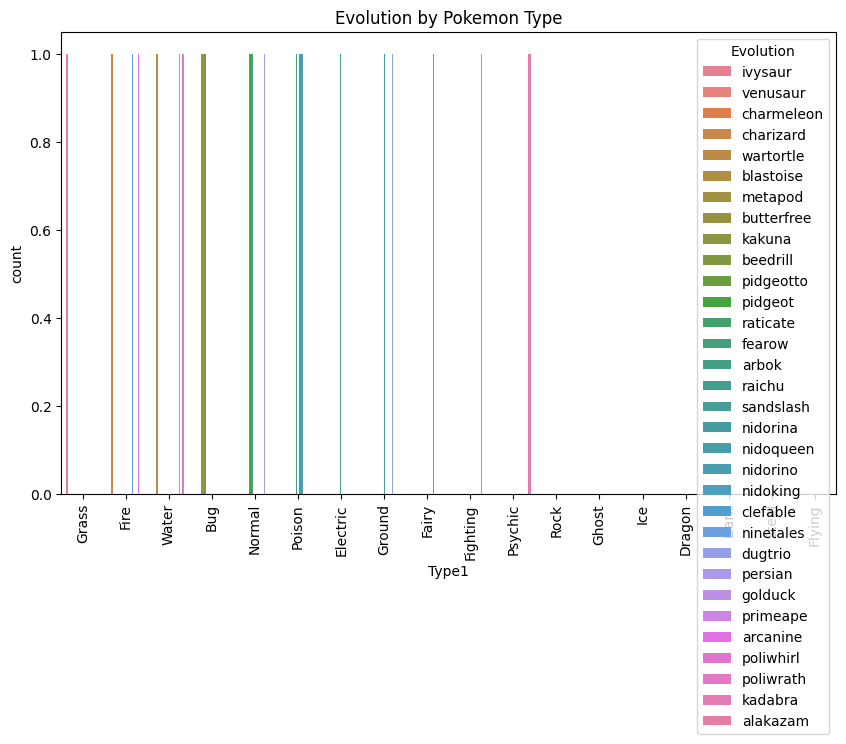

In [95]:
# Mostrar información básica sobre el dataset
print(df.info())

# Describir estadísticamente las columnas numéricas
print(df.describe())

# Verificar valores nulos
print(df.isnull().sum())

# Mostrar la distribución de los tipos de Pokémon (Type1)
print(df['Type1'].value_counts())

# Graficar algunas distribuciones de las columnas
import matplotlib.pyplot as plt
import seaborn as sns

# Graficar la distribución de los tipos de Pokémon
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Type1')
plt.title('Distribution of Pokemon Types (Type1)')
plt.xticks(rotation=90)
plt.show()

# Graficar la relación entre Type1 y Evolution
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Type1', hue='Evolution')
plt.title('Evolution by Pokemon Type')
plt.xticks(rotation=90)
plt.show()


# Preparación del Dataset

In [142]:
import gdown
import zipfile
import os

# Enlace directo del archivo
file_id = "1AUnw_rh2PPzjlj9X-2HqeEYAc0Jqlm7b"
download_url = f"https://drive.google.com/uc?id={file_id}"
output_file = "pokemon_dataset.zip"

# Descargar el archivo ZIP
gdown.download(download_url, output_file, quiet=False)

# Crear carpeta para extraer el contenido
output_dir = "pokemon_dataset"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Extraer el archivo ZIP
with zipfile.ZipFile(output_file, 'r') as zip_ref:
    zip_ref.extractall(output_dir)

print(f"Dataset extraído en la carpeta: {output_dir}")


Downloading...
From: https://drive.google.com/uc?id=1AUnw_rh2PPzjlj9X-2HqeEYAc0Jqlm7b
To: /content/pokemon_dataset.zip
100%|██████████| 3.86M/3.86M [00:00<00:00, 57.2MB/s]


Dataset extraído en la carpeta: pokemon_dataset


In [143]:
import os

# Listar los archivos extraídos
for root, dirs, files in os.walk(output_dir):
    for file in files:
        print(os.path.join(root, file))


pokemon_dataset/pokemon.csv
pokemon_dataset/images/cobalion.png
pokemon_dataset/images/ariados.png
pokemon_dataset/images/foongus.png
pokemon_dataset/images/turtwig.png
pokemon_dataset/images/dratini.png
pokemon_dataset/images/golem.png
pokemon_dataset/images/omastar.png
pokemon_dataset/images/loudred.png
pokemon_dataset/images/cosmoem.png
pokemon_dataset/images/milotic.png
pokemon_dataset/images/ninetales.png
pokemon_dataset/images/heliolisk.png
pokemon_dataset/images/minun.png
pokemon_dataset/images/minior-meteor.png
pokemon_dataset/images/torkoal.png
pokemon_dataset/images/sigilyph.png
pokemon_dataset/images/archen.png
pokemon_dataset/images/gabite.png
pokemon_dataset/images/gible.png
pokemon_dataset/images/unown.png
pokemon_dataset/images/makuhita.png
pokemon_dataset/images/braixen.png
pokemon_dataset/images/giratina-altered.png
pokemon_dataset/images/woobat.png
pokemon_dataset/images/aromatisse.png
pokemon_dataset/images/totodile.png
pokemon_dataset/images/klang.png
pokemon_datase

In [98]:
print(train_df['Type1'].value_counts())


Type1
Water       93
Normal      84
Grass       63
Bug         60
Fire        45
Psychic     43
Rock        37
Electric    32
Dark        25
Dragon      24
Poison      24
Steel       23
Ground      22
Ghost       19
Ice         19
Fighting    19
Fairy       13
Flying       2
Name: count, dtype: int64


In [99]:
import pandas as pd

# Ruta al archivo CSV
csv_path = os.path.join(output_dir, "pokemon.csv")  # Ajusta el nombre del archivo según corresponda
df = pd.read_csv(csv_path)

# Explorar el dataset
print(df.head())
print(df.info())


         Name  Type1   Type2   Evolution
0   bulbasaur  Grass  Poison     ivysaur
1     ivysaur  Grass  Poison    venusaur
2    venusaur  Grass  Poison         NaN
3  charmander   Fire     NaN  charmeleon
4  charmeleon   Fire     NaN   charizard
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 809 entries, 0 to 808
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       809 non-null    object
 1   Type1      809 non-null    object
 2   Type2      405 non-null    object
 3   Evolution  32 non-null     object
dtypes: object(4)
memory usage: 25.4+ KB
None


# Preprocesamiento de Imágenes


In [149]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split

# Ruta de las imágenes y el archivo CSV
csv_path = "pokemon_dataset/pokemon.csv"
image_dir = "pokemon_dataset/images"

# Cargar el dataset
df = pd.read_csv(csv_path)

# Preprocesar el DataFrame
df['filename'] = df['Name'] + ".png"  # Crear columna para nombres de archivo
df['Type1'] = df['Type1'].astype(str)  # Asegurar que 'Type1' sea string

# Dividir en conjuntos de entrenamiento y validación
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

# Explorar los datos
print("Clases únicas:", train_df['Type1'].unique())
print("Tamaño del entrenamiento:", len(train_df))
print("Tamaño de la validación:", len(val_df))


Clases únicas: ['Psychic' 'Steel' 'Dragon' 'Normal' 'Bug' 'Rock' 'Water' 'Fire'
 'Fighting' 'Ghost' 'Grass' 'Dark' 'Ice' 'Ground' 'Poison' 'Electric'
 'Fairy' 'Flying']
Tamaño del entrenamiento: 647
Tamaño de la validación: 162


In [150]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Este bloque de código se encarga de generar los datos de entrenamiento aplicando técnicas
# de aumento de datos (Data Augmentation) para mejorar la capacidad de generalización del modelo.
# La clase ImageDataGenerator permite realizar transformaciones aleatorias en las imágenes originales
# para crear mayor diversidad en el dataset.

datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,  # Rotación aleatoria
    width_shift_range=0.2,  # Desplazamiento horizontal
    height_shift_range=0.2,  # Desplazamiento vertical
    shear_range=0.2,  # Cizalladura
    zoom_range=0.2,  # Zoom aleatorio
    horizontal_flip=True,  # Inversión horizontal
    fill_mode='nearest'  # Completar los píxeles faltantes
)

train_generator = datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=image_dir,
    x_col="filename",
    y_col="Type1",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)


Found 647 validated image filenames belonging to 18 classes.


In [151]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.regularizers import l2

# Este bloque de código define un modelo de clasificación de imágenes utilizando MobileNetV2 como base preentrenada.
# MobileNetV2, entrenado previamente en el dataset ImageNet, se utiliza aquí para extraer características generales
# de las imágenes, mientras que se añaden capas personalizadas para adaptar el modelo a la tarea específica de
# clasificación de Pokémon. Las capas superiores incluyen regularización y Dropout para evitar el sobreajuste,
# Finalmente, el modelo se compila con el optimizador Adam y la función de
# pérdida de entropía cruzada categórica, adecuada para problemas de clasificación multiclase.


# Cargar MobileNetV2 como base
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False  # Congelar las capas base

# Construir el modelo con regularización L2
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(x)  # Regularización L2
x = Dropout(0.5)(x)
output = Dense(len(train_generator.class_indices), activation='softmax')(x)

# Crear el modelo
model = Model(inputs=base_model.input, outputs=output)

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [152]:
# Este bloque de código calcula el número de pasos por época para los generadores de entrenamiento y validación.
# Los pasos por época representan el número de lotes (batches) necesarios para procesar todo el conjunto de datos

steps_per_epoch = train_generator.samples // BATCH_SIZE
validation_steps = val_generator.samples // BATCH_SIZE


In [153]:
print(f"Número de muestras en el generador de entrenamiento: {train_generator.samples}")
print(f"Número de muestras en el generador de validación: {val_generator.samples}")


Número de muestras en el generador de entrenamiento: 647
Número de muestras en el generador de validación: 162


In [154]:
from tensorflow.keras.callbacks import EarlyStopping

#este bloque implementa el entrenamiento del modelo con la técnica de Early Stopping.
# Early Stopping detiene el entrenamiento automáticamente si no se observa una mejora en la métrica monitoreada

# Early stopping para detener el entrenamiento si no mejora
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Entrenar el modelo
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    class_weight=class_weights_dict  # Aplicar los pesos de clase si es necesario
)



Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 653ms/step - accuracy: 0.0628 - loss: 5.6710 - val_accuracy: 0.1063 - val_loss: 4.6842
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0312 - loss: 4.2556 - val_accuracy: 0.5000 - val_loss: 4.5571
Epoch 3/20


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 535ms/step - accuracy: 0.1046 - loss: 4.7712 - val_accuracy: 0.1000 - val_loss: 4.3147
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1562 - loss: 4.2948 - val_accuracy: 0.0000e+00 - val_loss: 4.1569
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 589ms/step - accuracy: 0.1171 - loss: 4.3736 - val_accuracy: 0.1063 - val_loss: 4.1132
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1875 - loss: 3.3529 - val_accuracy: 0.0000e+00 - val_loss: 4.1705
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 574ms/step - accuracy: 0.1110 - loss: 4.2021 - val_accuracy: 0.0875 - val_loss: 3.9710
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0625 - loss: 3.7860 - val_accuracy: 0.0000e+00 - val_loss: 3.6329
Epoch 9/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 522ms/step - accuracy: 0.1297 - loss: 3.7629 - val_accuracy: 0.1250 - val_loss: 3.7926
Epoch 10/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1875 - loss: 3.6658 - val_accuracy: 0.00

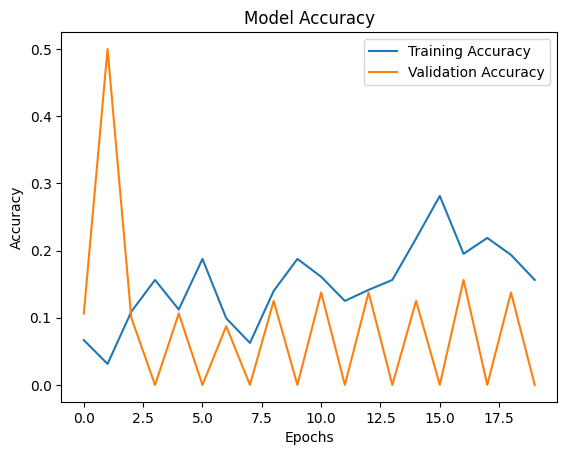

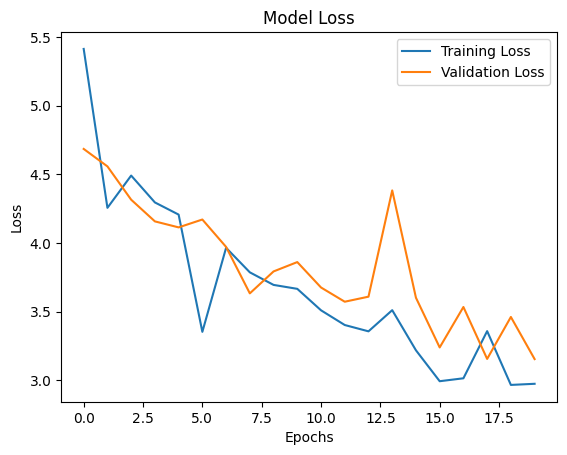

In [155]:
# Graficar métricas de entrenamiento
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step


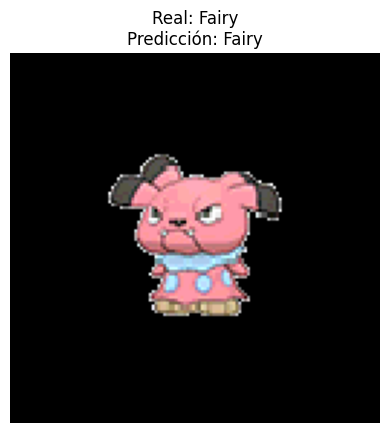

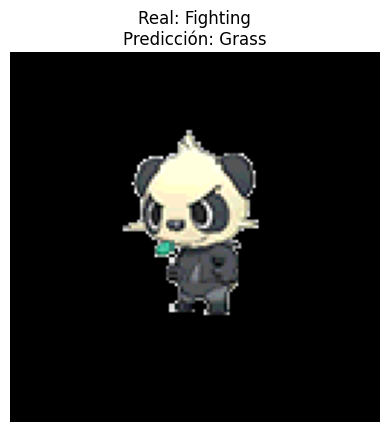

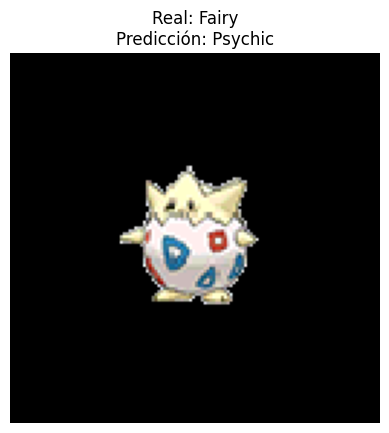

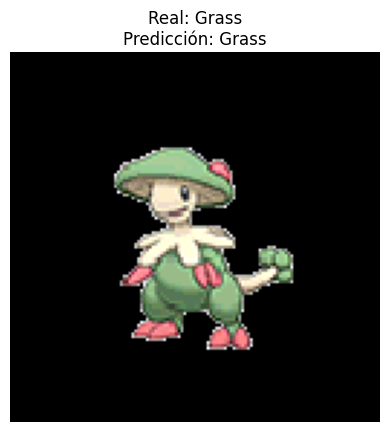

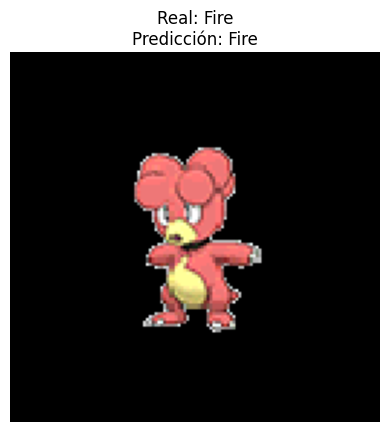

In [157]:
# Mostrar imágenes con predicciones y etiquetas reales
images, true_labels = next(val_generator)

# Generar predicciones
predictions = model.predict(images)
predicted_classes = predictions.argmax(axis=1)
true_classes = true_labels.argmax(axis=1)

# Mapeo de índices a nombres de clases
class_indices = {v: k for k, v in train_generator.class_indices.items()}

# Mostrar imágenes con predicciones
for i in range(5):  # Mostrar hasta 5 imágenes
    plt.figure()
    plt.imshow(images[i])
    plt.title(f"Real: {class_indices[true_classes[i]]}\nPredicción: {class_indices[predicted_classes[i]]}")
    plt.axis('off')
    plt.show()



6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 634ms/step


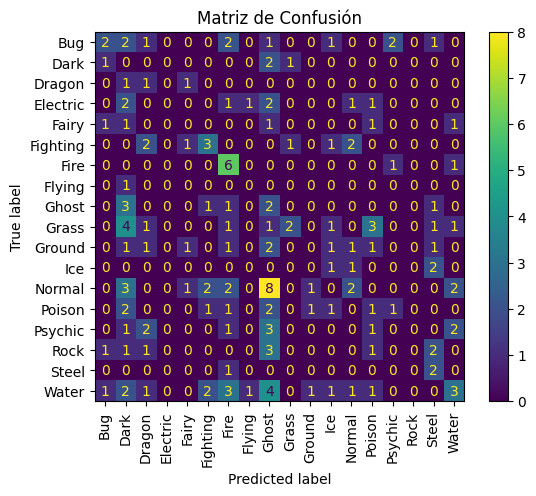

In [133]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Obtener las etiquetas reales y predichas para todo el conjunto de validación
true_labels = np.concatenate([val_generator[i][1] for i in range(len(val_generator))])
predictions = model.predict(val_generator)
predicted_labels = predictions.argmax(axis=1)
true_classes = true_labels.argmax(axis=1)

# Calcular la matriz de confusión
cm = confusion_matrix(true_classes, predicted_labels)

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(train_generator.class_indices.keys()))
disp.plot(cmap='viridis', xticks_rotation='vertical')
plt.title("Matriz de Confusión")
plt.show()
